In [29]:
## Question 2
import numpy as np
actions = {'north':(-1,0), 'south':(1,0), 'west':(0,-1), 'east':(0,1)}
N = 5
A = (0,1)
B = (0,3)
gamma = 0.9

# For a given (s,a) pair the s_d, and reward r is fixed
def find(s, a):
    if s == A:
        s_d, r = (4,1), 10
        return (s_d, r)
    if s == B:
        s_d, r = (2,3), 5
        return (s_d, r)
    x, y = s
    dx, dy = actions[a]
    x = x + dx
    y = y + dy
    r = 0
    if y<0:
        y = 0
        r = -1
    if y>=N:
        y = N-1
        r = -1
    if x<0:
        x = 0
        r = -1
    if x>=N:
        x = N-1
        r = -1
    s_d = (x,y)
    return (s_d, r)

def mdp(s_d, r, s, a):
    s_e, r_e = find(s,a)
    if s_d == s_e and r == r_e:
        return 1.0
    else:
        return 0.0
    
def E(s, V, pi):
    v = 0
    for a in actions:
        s_d, r = find(s, a)
        v += pi[(s, a)]*(r + gamma*V[s_d])
    return v

In [30]:
## For evaluating V_pi Policy Evaluation is used
rewards = [[0.0 for i in range(N)] for j in range(N)]
V = {}
states = []
for i in range(N):
    for j in range(N):
        s = (i,j)
        states.append(s)
        V[s] = 0.0
        
pi = {}
for i in states:
    for j in actions:
        pi[(i,j)] = 0.25

epsilon = 0.0001

def policy_eval(V, pi):
    ## Policy Evaluation
    while True:
        delta = 0
        for s in states:
            v = V[s]
            V[s] = E(s,V,pi)
            delta = max(delta, abs(v-V[s]))
        if delta < epsilon:
            break
    return V

def policy_upd(V, pi):
    ## Policy update
    f = True
    for s in states:
        old_a = None
        for a in actions:
            if pi[(s,a)] == 1:
                old_a = a
        if old_a == None:
            old_a = 'nan'
        a_given_s = None
        m = -1e9
        for a in actions:
            s_d, r = find(s, a)
            if r + gamma*V[s_d] > m:
                m = r + gamma*V[s_d]
                a_given_s = a
                
        for a in actions:
            pi[(s,a)] = 0

        pi[(s,a_given_s)] = 1.0
        if a_given_s != old_a:
            f = False
    return (pi, f)

In [31]:
## V is computed using policy evaluation for the given policy pi
V = policy_eval(V,pi)
for i in V:
    x, y = i
    rewards[x][y] = round(V[i],1)

rewards = np.array(rewards)
print(rewards)

[[ 3.3  8.8  4.4  5.3  1.5]
 [ 1.5  3.   2.3  1.9  0.5]
 [ 0.1  0.7  0.7  0.4 -0.4]
 [-1.  -0.4 -0.4 -0.6 -1.2]
 [-1.9 -1.3 -1.2 -1.4 -2. ]]


In [32]:
## Question 4
def policy_iteration(V, pi):
    ## Initialisation
    V = {}
    states = []
    for i in range(N):
        for j in range(N):
            s = (i,j)
            states.append(s)
            V[s] = 0.0

    pi = {}
    for i in states:
        for j in actions:
            pi[(i,j)] = 0.25
    f = False
    iter = 1
    ## The Program is bound to terminate as the policy update step deterministically picks the first action that maximuise q(s,a)
    while not f:
        print("Iteration:",iter)
        V = policy_eval(V, pi)
        pi, f = policy_upd(V, pi)
        iter += 1
    return (V, pi)

In [33]:
V, pi = policy_iteration(V, pi)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


In [34]:
for i in V:
    x, y = i
    rewards[x][y] = round(V[i],1)
    
for i in range(N):
    print(*rewards[i])
    
policy = [['' for i in range(N)] for j in range(N)]
for s in states:
    for a in actions:
        if pi[(s,a)] == 1.0:
            policy[s[0]][s[1]] = a
            
## Policy by Policy iter
policy = np.array(policy)
print("Policy by Policy iter")
print(policy)

## Since we know moves in A and B are independent and move to A' and B', we can set it to any
policy[A[0]][A[1]] = 'any'
policy[B[0]][B[1]] = 'any'
## Updated Policy
print("Updated Policy")
policy = np.array(policy)
print(policy)

22.0 24.4 22.0 19.4 17.5
19.8 22.0 19.8 17.8 16.0
17.8 19.8 17.8 16.0 14.4
16.0 17.8 16.0 14.4 13.0
14.4 16.0 14.4 13.0 11.7
Policy by Policy iter
[['east' 'north' 'west' 'north' 'west']
 ['east' 'north' 'north' 'west' 'west']
 ['east' 'north' 'north' 'north' 'north']
 ['east' 'north' 'north' 'north' 'north']
 ['east' 'north' 'north' 'north' 'north']]
Updated Policy
[['east' 'any' 'west' 'any' 'west']
 ['east' 'north' 'north' 'west' 'west']
 ['east' 'north' 'north' 'north' 'north']
 ['east' 'north' 'north' 'north' 'north']
 ['east' 'north' 'north' 'north' 'north']]


In [35]:
## Question 6

def show(V, pi, iteration):
    print(iteration)
    for i in V:
        x, y = i
        rewards[x][y] = round(V[i],1)

    policy = [['' for i in range(N)] for j in range(N)]

    for s in states:
        for a in actions:
            if pi[(s,a)] == 1:
                policy[s[0]][s[1]] = a

    policy[A[0]][A[1]] = "."
    policy[B[0]][B[1]] = "."
    for i in range(N):
        print(rewards[i])
    print()
    for i in range(N):
        print(policy[i])

def show_value(V, iteration):
    print(iteration)
    for i in V:
        x, y = i
        rewards[x][y] = round(V[i],1)
    for i in range(N):
        print(rewards[i])
    
actions = {'up':(-1,0), 'down':(1,0), 'left':(0,-1), 'right':(0,1)}
N = 4
A = (0,0)
B = (3,3)
gamma = 1.0
states = []
for i in range(N):
    for j in range(N):
        s = (i,j)
        states.append(s)

def find(s, a):
    x, y = s
    dx, dy = actions[a]
    x = x + dx
    y = y + dy
    r = -1
    if y<0:
        y = 0
    if y>=N:
        y = N-1
    if x<0:
        x = 0
    if x>=N:
        x = N-1
        
    s_d = (x,y)
    return (s_d, r)
    
rewards = [[0.0 for i in range(N)] for j in range(N)]
epsilon = 0.001

def E_max(s, V):
    v = -1e9
    for a in actions:
        s_d, r = find(s, a)
        v = max(v,(r + gamma*V[s_d]))
    return v

## Value iteration
def update(V):
    iter = 1
    while True:
        delta = 0
        for s in states:
            if s == A or s==B:
                continue
            v = V[s]
            V[s] = E_max(s,V)
            delta = max(delta, abs(v-V[s]))
        itr = "Iteration: " + str(iter)
        show_value(V, itr)
        iter+=1
        
        if delta < epsilon:
            break
    return V

def policy_update(V, pi):
    for s in states:
        if s == A or s==B:
            continue
        a_given_s = None
        m = -1e9
        for a in actions:
            s_d, r = find(s, a)
            if r + gamma*V[s_d] > m:
                m = r + gamma*V[s_d]
                a_given_s = a
                
        for a in actions:
            pi[(s,a)] = 0
        pi[(s,a_given_s)] = 1.0
    return pi

import random
def value_iteration():
    print("Value Iteration:")
    V = {}
    states = []
    for i in range(N):
        for j in range(N):
            s = (i,j)
            states.append(s)
            V[s] = random.random()
    V[A] = 0.0
    V[B] = 0.0

    pi = {}
    for i in states:
        for j in actions:
            pi[(i,j)] = 0.25
            
    V = update(V)
    pi = policy_update(V, pi)
    return (V, pi)


## Policy iteration
epsilon = 0.0001
def policy_eval(V, pi):
    while True:
        delta = 0
        for s in states:
            if s == A or s==B:
                continue
            v = V[s]
            V[s] = E(s,V,pi)
            delta = max(delta, abs(v-V[s]))
        if delta < epsilon:
            break
    return V

def policy_upd(V, pi):
    f = True
    for s in states:
        old_a = None
        for a in actions:
            if pi[(s,a)] == 1:
                old_a = a
        if old_a == None:
            old_a = 'nan'
        a_given_s = None
        m = -1e9
        for a in actions:
            s_d, r = find(s, a)
            if r + gamma*V[s_d] > m:
                m = r + gamma*V[s_d]
                a_given_s = a
                
        for a in actions:
            pi[(s,a)] = 0

        pi[(s,a_given_s)] = 1.0
        if a_given_s != old_a:
            f = False
    return (pi, f)

def policy_iteration():
    print("Policy Iteration:")
    V = {}
    states = []
    for i in range(N):
        for j in range(N):
            s = (i,j)
            states.append(s)
            V[s] = 0.0

    pi = {}
    for s in states:
        for a in actions:
            pi[(s,a)] = 0.25
    f = False
    iter = 1
    while not f:
        itr = "Iteration: " + str(iter)        
        V = policy_eval(V, pi)
        pi, f = policy_upd(V, pi)
        show(V, pi, itr)
        iter += 1
    return (V, pi)

V, pi = value_iteration()
print()
V_d, pi_d = policy_iteration()

Value Iteration:
Iteration: 1
[0.0, -0.2, -0.3, -0.4]
[-0.2, -0.3, -0.4, -0.2]
[-0.3, -0.3, -0.2, -0.2]
[-0.3, -0.3, -0.8, 0.0]
Iteration: 2
[0.0, -1.0, -1.3, -1.2]
[-1.0, -1.3, -1.2, -1.2]
[-1.3, -1.2, -1.2, -1.0]
[-1.3, -1.3, -1.0, 0.0]
Iteration: 3
[0.0, -1.0, -2.0, -2.2]
[-1.0, -2.0, -2.2, -2.0]
[-2.0, -2.2, -2.0, -1.0]
[-2.3, -2.0, -1.0, 0.0]
Iteration: 4
[0.0, -1.0, -2.0, -3.0]
[-1.0, -2.0, -3.0, -2.0]
[-2.0, -3.0, -2.0, -1.0]
[-3.0, -2.0, -1.0, 0.0]
Iteration: 5
[0.0, -1.0, -2.0, -3.0]
[-1.0, -2.0, -3.0, -2.0]
[-2.0, -3.0, -2.0, -1.0]
[-3.0, -2.0, -1.0, 0.0]

Policy Iteration:
Iteration: 1
[0.0, -14.0, -20.0, -22.0]
[-14.0, -18.0, -20.0, -20.0]
[-20.0, -20.0, -18.0, -14.0]
[-22.0, -20.0, -14.0, 0.0]

['.', 'left', 'left', 'left']
['up', 'up', 'left', 'down']
['up', 'up', 'right', 'down']
['up', 'right', 'right', '.']
Iteration: 2
[0.0, -1.0, -2.0, -3.0]
[-1.0, -2.0, -3.0, -2.0]
[-2.0, -3.0, -2.0, -1.0]
[-3.0, -2.0, -1.0, 0.0]

['.', 'left', 'left', 'down']
['up', 'up', 'up', 'do

In [36]:
show(V, pi, "Optimal (Value Iteration):")
print()
show(V_d, pi_d, "Optimal (Policy Iteration):")

Optimal (Value Iteration):
[0.0, -1.0, -2.0, -3.0]
[-1.0, -2.0, -3.0, -2.0]
[-2.0, -3.0, -2.0, -1.0]
[-3.0, -2.0, -1.0, 0.0]

['.', 'left', 'left', 'down']
['up', 'up', 'up', 'down']
['up', 'up', 'down', 'down']
['up', 'right', 'right', '.']

Optimal (Policy Iteration):
[0.0, -1.0, -2.0, -3.0]
[-1.0, -2.0, -3.0, -2.0]
[-2.0, -3.0, -2.0, -1.0]
[-3.0, -2.0, -1.0, 0.0]

['.', 'left', 'left', 'down']
['up', 'up', 'up', 'down']
['up', 'up', 'down', 'down']
['up', 'right', 'right', '.']


In [17]:
## Question 7

In [18]:
from math import *
import random
MAXN = 20
rent = 10
transport = -2
la_rental = 3
lb_rental = 4
la_return = 3
lb_return = 2
gamma = 0.9

fac = [1]*51
for i in range(1,51):
    fac[i] = fac[i-1]*i

In [19]:
def poison(x, l):
    return round(exp(-l)*pow(l,x)/fac[x], 5)

In [20]:
def get_prob(s, s_d, a):
    sa = s[0]
    sb = s[1]
    sa_d = s_d[0]
    sb_d = s_d[1]
    
    if sa_d > 20 or sb_d > 20 or sa > 20 or sb > 20:
        return [0, 0]
    
    if sa_d < 0 or sb_d < 0 or sa < 0 or sb < 0:
        return [0, 0]
        
    da = sa_d - sa
    db = sb_d - sb

    if sa - a > MAXN or sb + a > MAXN:
        return [0, 0]
    
    reward_in_a, reward_in_b = 0, 0
    pa, pb = 0.0, 0.0
    maxa = sa - a
    maxb = sb + a
    
    if maxa > 20 or maxb > 20:
        return [0, 0]
    
    for rent_in_a in range(maxa, -1, -1):
        return_in_a = da + rent_in_a + a
        if return_in_a < 0:
            continue
        p = poison(return_in_a, la_return)*poison(rent_in_a, la_rental)
        reward_in_a = reward_in_a + (rent_in_a*rent*p)
        pa += p
    
    for rent_in_b in range(maxb, -1, -1):
        return_in_b = db + rent_in_b - a
        if return_in_b < 0:
            continue
        p = poison(return_in_b, lb_return)*poison(rent_in_b, lb_rental)
        reward_in_b = reward_in_b + (rent_in_b*rent*p)
        pb += p
        
    r_park = 0
    if sa - a > 10:
        r_park = -4
    if sb + a > 10:
        r_park += -4
        
    if a>0:
        a -= 1
    total_reward = reward_in_a + reward_in_b + (abs(a)*transport)
    total_prob = pa*pb
    if total_prob > 1:
        print("Error")
        return 0,0
    return [total_prob, total_reward]    

In [21]:
def print_val(V):
    rewards = [[0 for i in range(21)] for j in range(21)]
    for i in V:
        x, y = i
        rewards[x][y] = V[i]
    for i in range(21):
        print(rewards[i])
    return rewards

def E(s, V, pi):
    v = 0
    for s_d in states:
        p, r = get_prob(s, s_d , pi[s])
        v = v + (p*(r + gamma*V[s_d]))
    return v

epsilon = 0.01

def policy_eval(V, pi):
    print("Policy Evaluation")
    iter = 0
    Vd = {}
    while True:
        iter+=1
        print("Sub-Iter:", iter)    
        delta = 0
        for s in states:
            Vd[s] = V[s]
        for s in states:
            v = Vd[s]
            V[s] = E(s,Vd,pi)
            delta = max(delta, abs(v-V[s]))
        if delta < epsilon:
            break
        for s in states:
            Vd[s] = V[s]
    return V

def policy_upd(V, pi):
    print("Policy Update")
    f = True
    for s in states:
        old_a = pi[s]
        a_given_s = None
        m = -1e9
        for a in actions:
            for s_d in states:
                p, r = get_prob(s, s_d, a)
                if p*(r + gamma*V[s_d]) > m:
                    m = p*(r + gamma*V[s_d])
                    a_given_s = a
        pi[s] = a_given_s
        if a_given_s != old_a:
            f = False
    return (pi, f)

def display_policy(pi):
    r = [[0 for i in range(21)] for j in range(21)]
    for s in states:
        r[s[0]][s[1]] = pi[s]
    r = np.array(r)
    print(r)
    return r

def policy_iteration(V, pi):
    f = False
    iter = 1
    while not f and iter<=4:
        print("Iteration:",iter)
        V = policy_eval(V, pi)
        pi, f = policy_upd(V, pi)
        display_policy(pi)
        iter += 1
    return (V, pi)


In [22]:
states = []
pi = {}
V = {}
actions = [i for i in range(-5,6)]
for i in range(MAXN+1):
    for j in range(MAXN+1):
        V[(i,j)] = random.random()
        states.append((i,j))
        pi[(i,j)] = 0

for s in states:
    pi[(s,0)] = 1.0

V, pi = policy_iteration(V,pi)

Iteration: 1
Policy Evaluation
Sub-Iter: 1
Sub-Iter: 2
Sub-Iter: 3
Sub-Iter: 4
Sub-Iter: 5
Sub-Iter: 6
Sub-Iter: 7
Sub-Iter: 8
Sub-Iter: 9
Sub-Iter: 10
Sub-Iter: 11
Sub-Iter: 12
Sub-Iter: 13
Sub-Iter: 14
Sub-Iter: 15
Sub-Iter: 16
Sub-Iter: 17
Sub-Iter: 18
Policy Update
[[ 0  0  0  0 -1 -1 -1 -2 -2 -3 -3 -3 -4 -4 -4 -4 -4 -5 -5 -5 -5]
 [ 1  0  0  0  0 -1 -1 -2 -2 -2 -2 -3 -3 -3 -3 -3 -4 -4 -4 -5 -5]
 [ 1  1  0  0  0  0 -1 -1 -1 -1 -2 -2 -2 -2 -3 -3 -3 -3 -4 -4 -4]
 [ 1  1  1  1  0  0  0  0 -1 -1 -1 -1 -2 -2 -2 -2 -2 -3 -3 -3 -3]
 [ 1  1  1  1  1  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -2 -2 -2 -2 -2]
 [ 2  2  1  1  1  1  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1]
 [ 2  2  2  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0 -1]
 [ 3  3  2  2  2  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0]
 [ 4  3  3  3  2  2  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0]
 [ 4  4  4  3  3  2  2  1  1  1  1  1  1  1  1  1  1  0  0  0  0]
 [ 5  5  4  4  3  3  2  2  1  1  1  1  1  1  1  1  1  1  1  0  0]
 [ 5

In [25]:
import seaborn as sb
import numpy as np
r = display_policy(pi)

[[ 0  0  0 -1 -1 -1 -2 -2 -3 -3 -3 -4 -4 -4 -4 -4 -5 -5 -5 -5 -5]
 [ 1  0  0  0  0 -1 -1 -2 -2 -2 -3 -3 -3 -3 -3 -4 -4 -4 -5 -5 -5]
 [ 1  1  0  0  0 -1 -1 -1 -2 -2 -2 -2 -2 -3 -3 -3 -3 -4 -4 -4 -4]
 [ 1  1  1  0  0  0  0 -1 -1 -1 -1 -1 -2 -2 -2 -2 -3 -3 -3 -3 -3]
 [ 1  1  1  1  0  0  0  0  0  0 -1 -1 -1 -1 -1 -2 -2 -2 -2 -2 -2]
 [ 2  2  1  1  1  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1]
 [ 2  2  2  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1]
 [ 3  3  2  2  1  1  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  3  3  2  1  1  1  1  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 4  4  3  2  2  1  1  1  1  1  0  0  0  1  0  0  0  0  0  0  0]
 [ 5  4  3  3  2  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0]
 [ 5  4  4  3  2  1  1  1  1  1  1  1  1  1  0  0  1  0  0  0  0]
 [ 5  5  4  3  2  2  1  1  1  1  1  1  1  1  1  0  0  0  0  0  0]
 [ 5  5  4  3  3  2  2  1  1  1  1  1  1  1  1  1  0  0  0  0  0]
 [ 5  5  4  4  3  1  1  1  1  1  1  1  1  1  1  1  1  0  0  0  0]
 [ 5  5  5

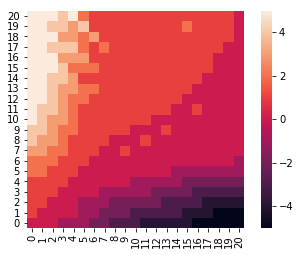

In [26]:
ax = sb.heatmap(r, square=True)
ax.invert_yaxis()